# Drive type
Chart of the popularity of various drive types over time.

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

register_data_path = '../../../vehicle_register/data/'


## Load data

In [18]:
register_cols = [
    'FirstRegistrationCZ',
    'DriveType',
]

register_dtypes = {
    'FirstRegistrationCZ': 'category',
    'DriveType': 'category',
}

df_register = pd.read_csv(
    f'{register_data_path}nosync/registr_silnicnich_vozidel_2023-02-24.analysis-cleaned-2023-06-13.csv',
    usecols=register_cols,
    dtype=register_dtypes,
    encoding_errors='ignore')

df_register['FirstRegistrationCZ'] = df_register['FirstRegistrationCZ'].apply(lambda x: int(x.split('-')[0]))
df_register = df_register[df_register['FirstRegistrationCZ'] >= 1990]

In [7]:
# def parse_drive_type(df: pd.DataFrame) -> pd.DataFrame:
#     options = [
#         'BA SMĚS',
#         'BIO Metan',
#         'BIO Nafta',
#         'CNG',
#         'Benzin',
#         'Elektropohon',
#         'Etanol',
#         'Etanol 85%',
#         'Etanol 95%',
#         'LNG',
#         'LPG',
#         'Nafta',
#         'Vodík'
#     ]

#     def process(x):
#         strx = str(x)

#         if strx == '' or strx == 'nan':
#             return np.nan

#         parts = strx.split('+')
#         parts = [part.strip() for part in parts]
#         parts.sort()

#         return tuple(parts)

#     df['DriveType'] = [process(x) for x in df['DriveType'].to_list()]
#     df['DriveType'] = df['DriveType'].astype('category')

#     return df

# df_register = parse_drive_type(df_register)

In [68]:
df_register.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8625569 entries, 24 to 8914836
Data columns (total 3 columns):
 #   Column               Dtype   
---  ------               -----   
 0   FirstRegistrationCZ  float64 
 1   DriveType            category
 2   HasDriveType         int64   
dtypes: category(1), float64(1), int64(1)
memory usage: 205.7 MB


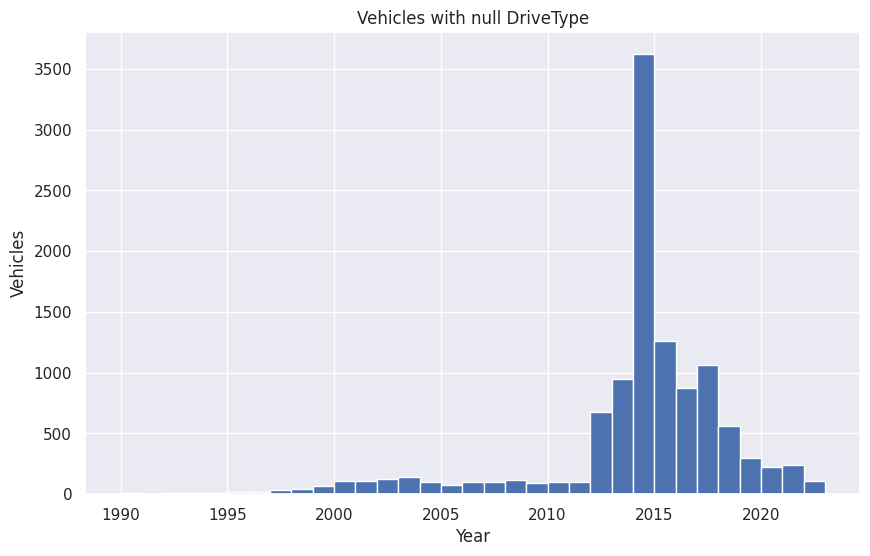

In [75]:
plt.title('Vehicles with null DriveType')
plt.xlabel('Year')
plt.ylabel('Vehicles')
df_register[df_register['DriveType'].isna()]['FirstRegistrationCZ'].hist(bins=33)
plt.show()

In [76]:
df_register = df_register.dropna(subset=['DriveType'])

## Preprocess data

In [77]:
drive_types = df_register['DriveType'].cat.categories
drive_types = list(drive_types)
drive_types

['BIO Nafta',
 'Benzin',
 'Benzin+Etanol 85%',
 'Benzin+LPG',
 'CNG',
 'Nafta',
 'Benzin+CNG',
 'BA SMĚS',
 'LPG',
 'Benzin+LNG',
 'Benzin+Elektropohon',
 'Benzin+Etanol 95%',
 'LPG+Nafta',
 'Benzin+CNG+Etanol',
 'BIO Metan',
 'Benzin+Etanol 85%+LPG',
 'Etanol 85%',
 'CNG+Nafta',
 'Benzin+CNG+LPG',
 'Elektropohon+Nafta',
 'LNG',
 'Elektropohon',
 'Benzin+Nafta',
 'Benzin+Elektropohon+LPG',
 'LNG+Nafta',
 'Vodík',
 'Etanol 95%']

In [83]:
groups = df_register.groupby(['DriveType'])['FirstRegistrationCZ'].value_counts()
groupsx = pd.DataFrame({'Count': groups}, index=groups.index)
groupsx.sort_values(by=['DriveType', 'FirstRegistrationCZ'])
years = [i for i in range(1990, 2023 + 1)]

# Fill missing zeroes.
for year in years:
    for dt in drive_types:
        if (dt, year) not in groupsx.index:
            groupsx.loc[(dt, year), 'Count'] = 0

groupsx_o = groupsx
groupsx = groupsx.reset_index()

groupsx.sort_values(['FirstRegistrationCZ']).tail(30)

,DriveType,FirstRegistrationCZ,Count
24,BIO Nafta,2022.0,177
314,Benzin+LNG,2022.0,18
463,Benzin+CNG+Etanol,2022.0,0
337,Benzin+LNG,2023.0,0
296,LPG,2023.0,2
427,LPG+Nafta,2023.0,0
344,Benzin+Elektropohon,2023.0,997
396,Benzin+Etanol 95%,2023.0,0
197,Nafta,2023.0,23911
241,BA SMĚS,2023.0,6


In [88]:
# Standardize to sum of counts in each year = 1.

for year in years:
    total = groupsx[groupsx['FirstRegistrationCZ'] == year]['Count'].sum()
    for dt in drive_types:
        groupsx.loc[(groupsx['FirstRegistrationCZ'] == year) & (groupsx['DriveType'] == dt), 'Count'] = groupsx[(groupsx['FirstRegistrationCZ'] == year) & (groupsx['DriveType'] == dt)]['Count'] / total
    
groupsx.sort_values(['FirstRegistrationCZ']).tail(10)

,DriveType,FirstRegistrationCZ,Count
624,Benzin+CNG+LPG,2023.0,0.000000
585,CNG+Nafta,2023.0,0.000000
550,Etanol 85%,2023.0,0.000000
28,BIO Nafta,2023.0,0.000000
535,Benzin+Etanol 85%+LPG,2023.0,0.000000
222,Benzin+CNG,2023.0,0.000511
883,Vodík,2023.0,0.000000
496,BIO Metan,2023.0,0.000000
152,CNG,2023.0,0.001278
917,Etanol 95%,2023.0,0.000000


## Plot

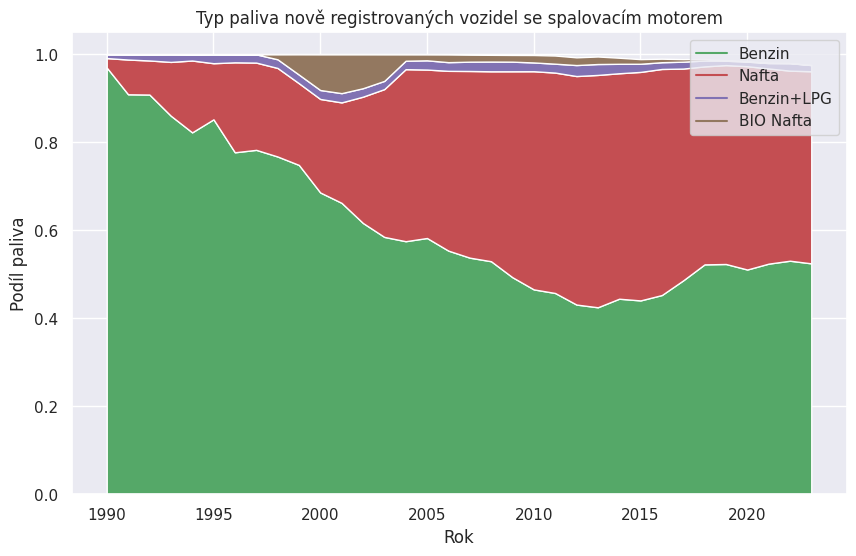

In [153]:
group_values = [groupsx[(groupsx['DriveType'] == dt)].sort_values(['FirstRegistrationCZ'])['Count'] for dt in ['Benzin', 'Nafta', 'Benzin+LPG', 'BIO Nafta']]
# all_elec = [groupsx[(groupsx['DriveType'] == dt)].sort_values(['FirstRegistrationCZ'])['Count'] for dt in ['Benzin+Elektropohon+LPG', 'Elektropohon', 'Elektropohon+Nafta', 'Benzin+Elektropohon',]]
# elec_sum = []

# for dt in drive_types:
#     plt.plot([], [], label=dt, linewidth=5)

plt.plot([], [], label='Benzin', color=sns.color_palette()[2])
plt.plot([], [], label='Nafta', color=sns.color_palette()[3])
plt.plot([], [], label='Benzin+LPG', color=sns.color_palette()[4])
plt.plot([], [], label='BIO Nafta', color=sns.color_palette()[5])

plt.stackplot(years, group_values, colors=[sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[4], sns.color_palette()[5]])
plt.title('Typ paliva nově registrovaných vozidel se spalovacím motorem')
plt.xlabel('Rok')
plt.ylabel('Podíl paliva')
plt.legend()
plt.show()

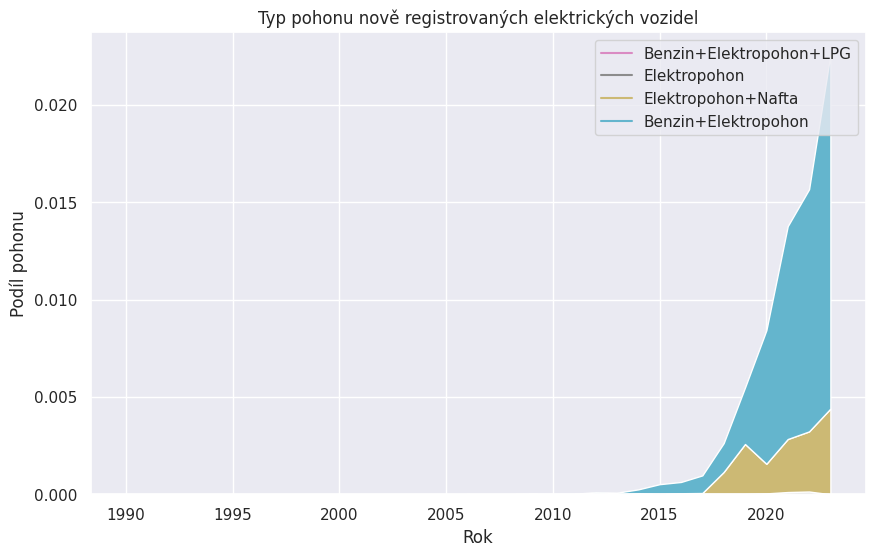

In [143]:
dt_elec = ['Benzin+Elektropohon+LPG', 'Elektropohon', 'Elektropohon+Nafta', 'Benzin+Elektropohon',]
all_elec = [groupsx[(groupsx['DriveType'] == dt)].sort_values(['FirstRegistrationCZ'])['Count'] for dt in dt_elec]

for i, dt in enumerate(dt_elec):
    plt.plot([], [], label=dt, color=sns.color_palette()[i + 6])

plt.stackplot(years, all_elec, colors=[sns.color_palette()[i + 6] for i in range(len(dt_elec))])
plt.title('Typ pohonu nově registrovaných elektrických vozidel')
plt.xlabel('Rok')
plt.ylabel('Podíl pohonu')
plt.legend()
plt.show()